### Installing the dependencies

In [5]:
#!pip install nltk

### Importing NLTK Library

In [1]:
#from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

### Loading Model for NLTK

In [2]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aadit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Reading the input file and generating tokens

In [3]:
file_content = open("Corpus_NLP.txt").read()
tokens = nltk.word_tokenize(file_content)
print(len(tokens))

2915666


### Generating type (Unique tokens) and their respective count

In [14]:
type_token=nltk.FreqDist(tokens)
print(type_token)
filtered_word_freq = pd.DataFrame([dict((word, freq) for word, freq in type_token.items())]).T.rename_axis("unique_tokens").reset_index()
filtered_word_freq.set_axis(['unique_tokens','freq'],axis=1, inplace=True)


<FreqDist with 106200 samples and 2915666 outcomes>


In [15]:
filtered_word_freq['unique_tokens'].count()

106200

### Ratio of the type/tokens

In [16]:
filtered_word_freq['unique_tokens'].count()/len(tokens)

0.03642392509978852

### Printing tokens and count to a file and generating for report

In [17]:
token_count=filtered_word_freq.sort_values(by='freq',ascending=False)

In [18]:
token_count.head(20)

,unique_tokens,freq
7,.,122683
20,'',85054
41,the,84270
2,",",77973
39,to,60086
35,a,55442
3,I,55385
23,and,45873
120,of,38445
0,``,35345


In [19]:
token_count.to_csv('token.txt',header=None, sep=' ')

### Tokens appearing only once

In [20]:
filtered_word_freq[filtered_word_freq['freq']==1]['unique_tokens'].count()

57847

### Removing Punctuations ###

In [58]:
no_punct_text = []
for word in tokens:
    if word.isalpha():
        no_punct_text.append(word)
print(len(no_punct_text))

2353399


### Ratio of the type/tokens- without punctuations

In [43]:
type_token_w_punc=nltk.FreqDist(no_punct_text)
print(type_token)
filtered_word_freq_w_punc = pd.DataFrame([dict((word, freq) for word, freq in type_token_w_punc.items())]).T.rename_axis("unique_tokens").reset_index()
filtered_word_freq_w_punc.set_axis(['unique_tokens','freq'],axis=1, inplace=True)


<FreqDist with 85586 samples and 85586 outcomes>


In [45]:
print(filtered_word_freq_w_punc['unique_tokens'].count()/len(no_punct_text))
token_count_w_punc=filtered_word_freq_w_punc.sort_values(by='freq',ascending=False)


0.03642646232109387


### Top 3 words with the frequency (Removing punctuations)

In [46]:
token_count_w_punc.head(3)

,unique_tokens,freq
32,the,84270
30,to,60086
26,a,55442


### Removing Stopwords

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'of', 'into', "wasn't", 'not', 'at', 'some', 'who', 'up', "isn't", 'off', 'my', 'isn', 'are', "couldn't", "it's", 'no', "shouldn't", 'after', 'own', 'over', 'him', 'just', 'other', 'or', 'each', 'so', 'when', 'didn', 'mustn', 'i', 'by', 'our', 'himself', 'in', 'out', 'been', 'ain', 'o', 'mightn', 'ourselves', 'where', 'couldn', 'them', 'below', 'such', 'any', "hasn't", 'during', 'm', "that'll", 'a', 'while', "shan't", 'how', 'wasn', 'same', 'before', 're', 'ours', "you'd", 'these', 'there', 'than', 'should', 'have', 'if', 'will', "didn't", 'why', "weren't", 'needn', 'that', "you've", 'wouldn', 'against', 'me', 'being', 'be', 'has', 'll', 'she', 'once', 't', 'he', 'your', 'it', 'from', 'hasn', 'all', 'the', 'aren', 'very', "you're", "wouldn't", 'do', "you'll", "mustn't", 'those', 'we', 'under', 'don', 'shan', 'most', 'yours', 'both', 'what', 'won', 'theirs', 'with', 'more', 'ma', 'd', 'his', 'through', 'but', 'until', "needn't", 'they', "doesn't", 'an', 'was', 'then', 'did', 'themselve

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
file_content
filtered_text = []

for each_word in tokens:
    if each_word not in stop_words:
        filtered_text.append(each_word)


### Removing Stopwords and Punctuations

In [51]:
only_words = []

for each_word in tokens:
    if each_word not in stop_words and each_word.isalpha():
        only_words.append(each_word)


### Tokens w/o Punctuations and Stopwords)

In [52]:
type_token_w_punc_stop=nltk.FreqDist(only_words)
filtered_word_freq_w_punc_stop = pd.DataFrame([dict((word, freq) for word, freq in type_token_w_punc_stop.items())]).T.rename_axis("unique_tokens").reset_index()
filtered_word_freq_w_punc_stop.set_axis(['unique_tokens','freq'],axis=1, inplace=True)

### Ratio of type of tokens to number of tokens

In [55]:
print(filtered_word_freq_w_punc_stop['unique_tokens'].count()/len(only_words))
token_count_w_punc=filtered_word_freq_w_punc.sort_values(by='freq',ascending=False)

0.06208384866762661


### Top 3 words only excluding stopwords

In [59]:
type_token_sw=nltk.FreqDist(filtered_text)
filtered_word_freq_w_stop = pd.DataFrame([dict((word, freq) for word, freq in type_token_sw.items())]).T.rename_axis("unique_tokens").reset_index()
filtered_word_freq_w_stop.set_axis(['unique_tokens','freq'],axis=1, inplace=True)
token_count_w_stop=filtered_word_freq_w_stop.sort_values(by='freq',ascending=False)

In [60]:
token_count_w_stop.head(3)

,unique_tokens,freq
6,.,122683
14,'',85054
2,",",77973


### Bigrams

In [75]:
extract_bigrams=nltk.bigrams(only_words)
bigram_dist=nltk.FreqDist(extract_bigrams)
bigram_freq = pd.DataFrame([dict((word, freq) for word, freq in bigram_dist.items())]).T.rename_axis("unique_tokens").reset_index()
bigram_freq.set_axis(['unique_tokens','freq'],axis=1, inplace=True)
bigram_freq=bigram_freq.sort_values(by='freq',ascending=False)

In [76]:
bigram_freq.head(3)

,unique_tokens,freq
514,"(I, think)",2810
216394,"(fuck, fuck)",1998
415,"(I, know)",1710


### Frequency distribution of words

In [10]:
from nltk.probability import FreqDist

In [11]:
freq_dist_of_words = FreqDist(tokenized_word)   # Without removing stopwords
freq_dist_of_words_2 = FreqDist(filtered_text)  # Removing Stopwords

In [12]:
print(freq_dist_of_words)

<FreqDist with 106179 samples and 2915692 outcomes>


In [13]:
print(freq_dist_of_words_2)

<FreqDist with 106030 samples and 1940827 outcomes>


In [14]:
freq_dist_of_words.most_common(20)

[('.', 122712),
 ("''", 85048),
 ('the', 84270),
 (',', 77973),
 ('to', 60086),
 ('a', 55442),
 ('I', 55385),
 ('and', 45873),
 ('of', 38445),
 ('``', 35348),
 ('?', 33474),
 ('is', 33456),
 ('it', 30482),
 ('in', 29783),
 ('that', 29155),
 ('you', 27879),
 ("'s", 25406),
 ('for', 22883),
 ("n't", 22598),
 ('on', 17296)]

In [15]:
freq_dist_of_words_2.most_common(20)

[('.', 122712),
 ("''", 85048),
 (',', 77973),
 ('I', 55385),
 ('``', 35348),
 ('?', 33474),
 ("'s", 25406),
 ("n't", 22598),
 ('!', 11933),
 ('*', 11472),
 ('like', 10275),
 (')', 9623),
 ('(', 8920),
 ('would', 8768),
 (':', 8752),
 ('The', 7956),
 ('people', 7513),
 ('get', 7370),
 ('It', 7031),
 ("'m", 7023)]

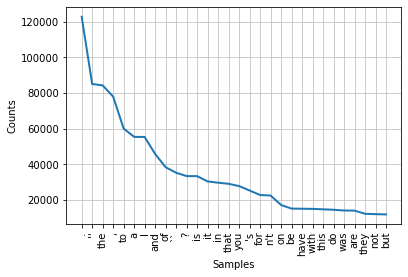

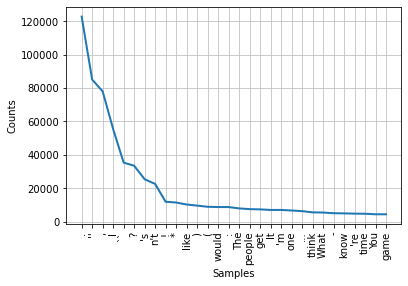

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
freq_dist_of_words.plot(30, cumulative=False)

freq_dist_of_words_2.plot(30,cumulative=False)